In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("Wine_clust.csv")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [7]:
def evaluate_models(X, model_type='kmeans', max_k=10):
    sse = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        if model_type == 'kmeans':
            model = KMeans(n_clusters=k, random_state=42)
        else:
            model = AgglomerativeClustering(n_clusters=k)
        
        labels = model.fit_predict(X)
        sse.append(model.inertia_ if model_type == 'kmeans' else 0)
        silhouette_scores.append(silhouette_score(X, labels))
            
    return k_range, sse, silhouette_scores

In [8]:
k_kmeans, sse_kmeans, sil_kmeans = evaluate_models(X_scaled, 'kmeans')
k_agg, _, sil_agg = evaluate_models(X_scaled, 'agglomerative')

Text(0, 0.5, 'SSE')

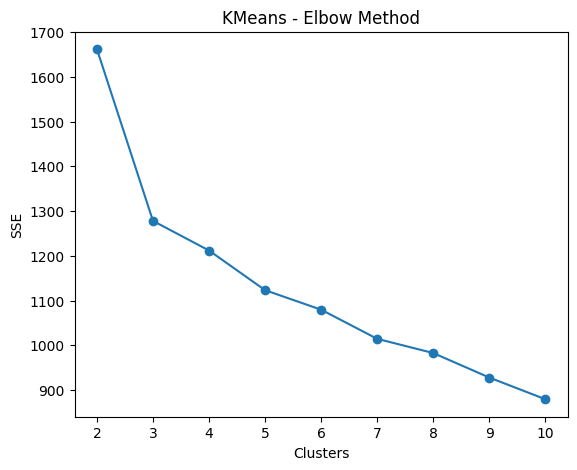

In [9]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_kmeans, sse_kmeans, 'o-')
plt.title('KMeans - Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')

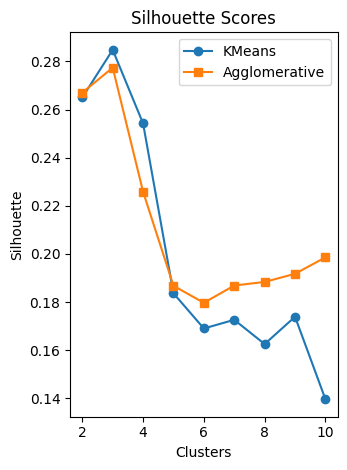

In [10]:
plt.subplot(1, 2, 2)
plt.plot(k_kmeans, sil_kmeans, 'o-', label='KMeans')
plt.plot(k_agg, sil_agg, 's-', label='Agglomerative')
plt.title('Silhouette Scores')
plt.xlabel('Clusters')
plt.ylabel('Silhouette')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

In [12]:
eps_list = [0.5, 0.7, 1.0, 1.2]
for eps in eps_list:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    sil = silhouette_score(X_scaled, labels) if n_clusters > 1 else -1
    print(f"DBSCAN (eps={eps}): clusters={n_clusters}, silhouette={sil:.3f}")


DBSCAN (eps=0.5): clusters=0, silhouette=-1.000
DBSCAN (eps=0.7): clusters=0, silhouette=-1.000
DBSCAN (eps=1.0): clusters=0, silhouette=-1.000
DBSCAN (eps=1.2): clusters=0, silhouette=-1.000


Text(0, 0.5, 'PCA 2')

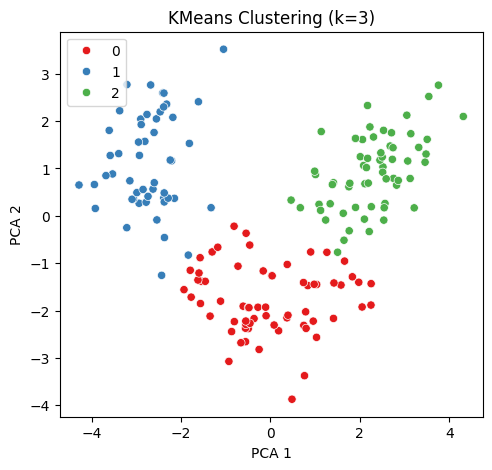

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('KMeans Clustering (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


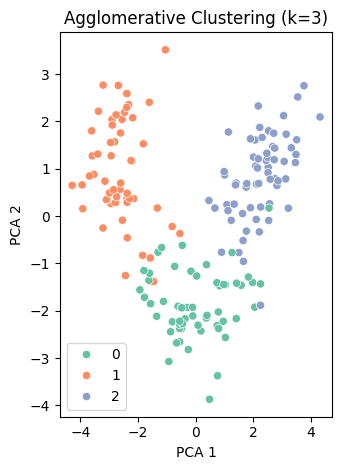

In [14]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='Set2')
plt.title('Agglomerative Clustering (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()